In [1]:
# Install the ultralytics package using pip
!pip install ultralytics

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for ultralytics from https://files.pythonhosted.org/packages/28/76/3f4ba6c345461cbf79fb45828cdc42b15f60b65a3474e35ad6f476d1d4c7/ultralytics-8.0.230-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/663.2 kB ? eta -:--:--
   --- ------------------------------------ 61.4/663.2 kB 1.7 MB/s eta 0:00:01
   ---------------- ----------------------- 276.5/663.2 kB 3.4 MB/s eta 0:00:01
   ---------------------- ----------------- 368.6/663.2 kB 3.3 MB/s eta 0:00:01
   ---------------------------------------- 663.2/663.2 kB 3.8 MB/s eta 0:00:00


In [2]:
from ultralytics import YOLO
from matplotlib import pyplot as plt
from PIL import Image

In [3]:
#Detection model
det_model = YOLO('yolov8n.pt')

#Instance model
inst_model = YOLO('yolov8n-seg.pt')

100%|██████████| 6.23M/6.23M [00:00<00:00, 6.75MB/s]


100%|██████████| 6.73M/6.73M [00:01<00:00, 6.63MB/s]


Run inference on an input image using both models.

In [4]:
# Perform object detection on an image using the model
img = 'kitchen.jpg'
detection_results = det_model.predict(img)
instance_results = inst_model.predict(img)



image 1/1 k:\Github\consultations\6-YOLO\kitchen.jpg: 448x640 3 chairs, 5 potted plants, 2 dining tables, 2 ovens, 2 refrigerators, 1 vase, 174.0ms
Speed: 5.0ms preprocess, 174.0ms inference, 12.0ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 k:\Github\consultations\6-YOLO\kitchen.jpg: 448x640 2 bowls, 1 chair, 2 potted plants, 1 dining table, 1 oven, 1 refrigerator, 1 vase, 127.0ms
Speed: 3.0ms preprocess, 127.0ms inference, 13.0ms postprocess per image at shape (1, 3, 448, 640)


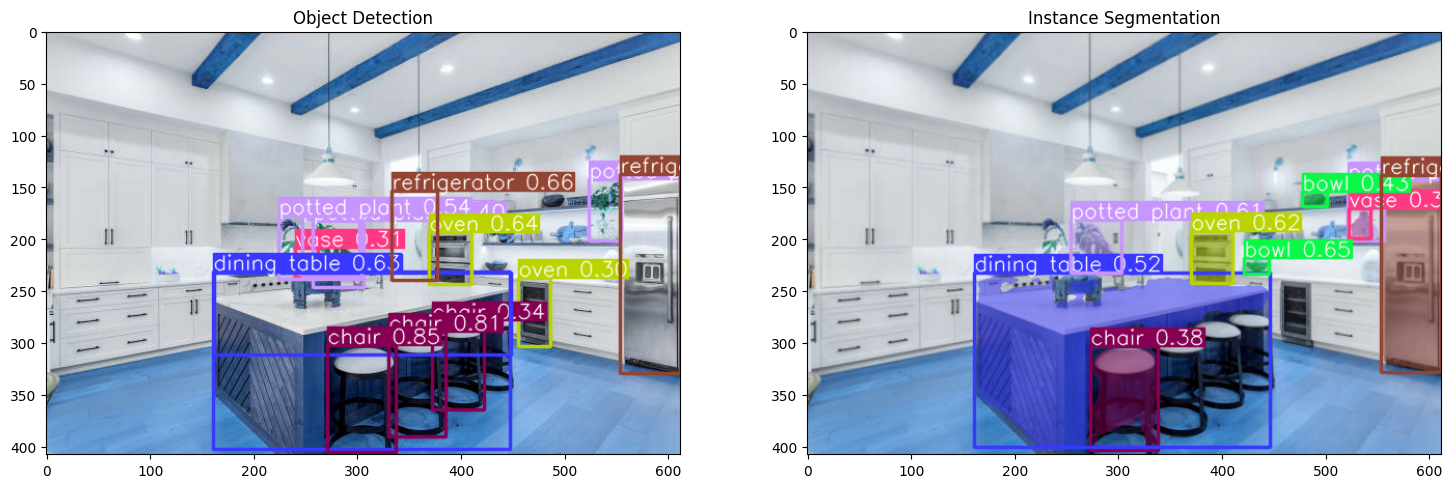

In [5]:
detection_result_array = detection_results[0].plot()
instance_result_array = instance_results[0].plot()
fig = plt.figure(figsize=(18, 9))
ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Object Detection")
ax1.imshow(detection_result_array)
ax2 = fig.add_subplot(1,2,2)
ax2.set_title("Instance Segmentation")
ax2.imshow(instance_result_array)

You can explore the results manually. For example, how many instance results do we have, what is the label and bounding box coordinates for a specific detected object.

In [6]:
#Number of bounding boxes (objects) detected in the image
result = instance_results[0]
len(result.boxes)

9

In [7]:
#BBOX coordinates, class ID, and probability for a specific box.
box = result.boxes[0]
cords = box.xyxy[0].tolist()
class_id = box.cls[0].item()
conf = box.conf[0].item()
print("Object type:", class_id)
print("Coordinates:", cords)
print("Probability:", conf)
print(result.names)

Object type: 72.0
Coordinates: [553.0379028320312, 139.61212158203125, 611.6121826171875, 329.1780700683594]
Probability: 0.7502031326293945
{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 